Code from Nicholas Renotte

0. Install Dependencies and Bring Data

In [1]:
!pip install tensorflow pandas matplotlib sklearn

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
df = pd.read_csv(
        os.path.join('jigsaw-toxic-comment-classification-challenge', 'train.csv', 'train.csv')
        )

In [4]:
df.iloc[2]['comment_text']

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [5]:
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df[df.columns[2:]].iloc[10]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 10, dtype: int64

In [7]:
df[df['toxic'] == 1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


1. Preprocess

In [8]:
from tensorflow.keras.layers import TextVectorization as tv

In [9]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [10]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [11]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [12]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [13]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [14]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [15]:
MAX_WORDS = 200000 # number of words in the vocab
MAX_COMMENT_LENGTH = 1800 # number of chars in comment

In [16]:
vectorizer = tv(max_tokens = MAX_WORDS,
                output_sequence_length = MAX_COMMENT_LENGTH,
                output_mode = 'int'
               )

In [17]:
type(X)

pandas.core.series.Series

In [18]:
type(X.values) # we want numpy array

numpy.ndarray

In [19]:
vectorizer.adapt(X.values)

In [20]:
# vectorizer.get_vocabulary()

In [21]:
vectorizer('Hello world, life is beautiful')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288, 263, 306, ...,   0,   0,   0], dtype=int64)>

In [22]:
vectorizer('Hello world, life is beautiful')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 288,  263,  306,    9, 2977], dtype=int64)>

In [23]:
vectorized_text = vectorizer(X.values)

In [24]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [25]:
len(X)

159571

In [26]:
# MCSHBAP - map, cache, shuffle, batch, prefetch from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps prevent bottlenecks

In [27]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [28]:
batch_X.shape

(16, 1800)

In [29]:
batch_y.shape

(16, 6)

In [30]:
train = dataset.take(int(len(dataset)*.7)) # no. of batches
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [31]:
train_generator = train.as_numpy_iterator()

In [32]:
train_generator.next()

(array([[ 387, 4439,   16, ...,    0,    0,    0],
        [ 704, 1144,   22, ...,    0,    0,    0],
        [  76, 1144, 2857, ...,    0,    0,    0],
        ...,
        [ 314,  181, 1474, ...,    0,    0,    0],
        [  11,    2,  726, ...,    0,    0,    0],
        [1190,   23,    7, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0]], dtype=int64))

2. Create Sequential Model

In [36]:
from tensorflow.keras.models import Sequential as sq
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [37]:
model = sq()
# Create the embedding layer
model.add(Embedding(MAX_WORDS+1, 32))
# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor fully connected layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
# Final layer (no of labels)
model.add(Dense(6, activation = 'sigmoid'))

In [38]:
model.compile(loss = 'BinaryCrossentropy', optimizer = 'Adam')

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [40]:
history = model.fit(train, epochs = 1, validation_data = val)

6981/6981 [==============================] - 6843s 980ms/step - loss: 0.0620 - val_loss: 0.0459


In [41]:
from matplotlib import pyplot as plt

In [42]:
history.history

{'loss': [0.061952438205480576], 'val_loss': [0.04593706503510475]}

<Figure size 800x500 with 0 Axes>

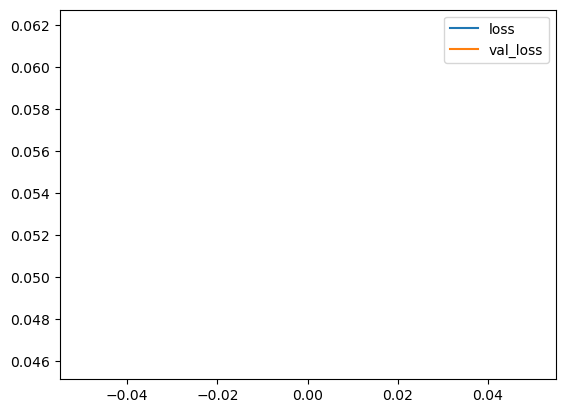

In [44]:
plt.figure(figsize = (8, 5))
pd.DataFrame(history.history).plot()
plt.show()

3. Make Predictions

In [45]:
input_text = vectorizer('You freaking suck!')

In [46]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0], dtype=int64)>

In [47]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 2s 2s/step


In [48]:
np.expand_dims(input_text, 0)

array([[   7, 7158,  397, ...,    0,    0,    0]], dtype=int64)

In [49]:
model.predict(np.array([input_text]))

1/1 [==============================] - 0s 105ms/step


array([[0.9969737 , 0.08332887, 0.960317  , 0.03093663, 0.852792  ,
        0.07843201]], dtype=float32)

In [50]:
model.predict(np.expand_dims(input_text, 0))
# 0.5 is the threshold

1/1 [==============================] - 0s 89ms/step


array([[0.9969737 , 0.08332887, 0.960317  , 0.03093663, 0.852792  ,
        0.07843201]], dtype=float32)

In [51]:
batch = test.as_numpy_iterator().next()

In [52]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [53]:
model.predict(batch_X)

1/1 [==============================] - 0s 184ms/step


array([[1.1199782e-02, 9.1643403e-07, 9.9225424e-04, 1.1840778e-04,
        4.3279314e-03, 2.0315021e-04],
       [1.1256404e-02, 9.7629561e-07, 1.0177061e-03, 1.2260978e-04,
        4.4059153e-03, 2.1043474e-04],
       [5.4543889e-03, 1.7074679e-07, 4.0466548e-04, 3.7634112e-05,
        2.0722246e-03, 7.1206370e-05],
       [6.3621573e-02, 6.2909712e-05, 9.4660111e-03, 2.0728626e-03,
        2.6670668e-02, 2.8245179e-03],
       [2.5631784e-04, 3.4100378e-10, 1.5180933e-05, 6.5655263e-07,
        8.9125620e-05, 1.5646582e-06],
       [5.3478954e-03, 2.1420485e-07, 4.5523624e-04, 4.3466312e-05,
        2.0458547e-03, 8.1738915e-05],
       [8.0497721e-03, 4.2775497e-07, 6.5986521e-04, 7.0512404e-05,
        3.0977246e-03, 1.2620882e-04],
       [3.0320077e-03, 6.1503378e-08, 2.3940160e-04, 1.9786421e-05,
        1.1068386e-03, 3.8257855e-05],
       [1.0252643e-03, 4.0314734e-09, 5.6410401e-05, 2.9307014e-06,
        3.8444399e-04, 6.9689595e-06],
       [2.5544856e-03, 3.2573990e-08,

In [54]:
model.predict(batch_X) > 0.5

1/1 [==============================] - 0s 177ms/step


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [55]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 153ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [56]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

4. Evaluate Model

In [57]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [58]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [59]:
for batch in test.as_numpy_iterator():
    # Unpack batch
    X_true, y_true = batch
    # Make prediction
    yhat = model.predict(X_true)
    
    # Flatten predictions - make into 1 big array
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 206ms/step


In [62]:
print(f"Precision: {pre.result().numpy()},\n Recall: {re.result().numpy()},\n Accuracy: {acc.result().numpy()}")

Precision: 0.8384615182876587,
 Recall: 0.6806950569152832,
 Accuracy: 0.4824473559856415


5. Test and Gradio

In [100]:
!pip install gradio jinja2

In [104]:
!pip uninstall typing_extensions --yes
!pip install typing_extensions==4.7.1

Found existing installation: typing_extensions 4.7.1
Uninstalling typing_extensions-4.7.1:
  Successfully uninstalled typing_extensions-4.7.1
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)


In [105]:
# import tensorflow as tf
import gradio as gr

ImportError: cannot import name 'deprecated' from 'typing_extensions' (C:\Users\rishe\anaconda3\lib\site-packages\typing_extensions.py)

In [ ]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
input_str = vectorizer('hey i freaking hate you. Go back home!')

In [ ]:
res = model.predict(np.expand_dims(input_str, 0))

In [ ]:
df.columns[2:]

In [ ]:
res

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ""
    # 0 or 1 for ecah column: toxic, severly toxic, ... etc
    for idx, col in enumerate(df.columns[2:]):
        text += "{}: {}\n".format(col, results[0][idx] > 0.5)
        
    return text

In [ ]:
interface = gr.Interface(fn = score_comment,
                         inputs = gr.inputs.Textbox(lines = 2, placeholder = "Comment to evaluate"),
                         outputs = "text"
                        )

In [ ]:
interface.launch(share = False)
# share = True, publicly hosted for 72 hours
# app?